In [17]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import scipy.stats
import scipy.optimize 

In [2]:
simulation_subfolder1 = "single_population"
simulation_subfolder2 = "marchenko_pastur"
current_folder = os.getcwd()
home_folder = os.path.split(current_folder)[0]
simulation_subfolder = os.path.join(home_folder,simulation_subfolder1,simulation_subfolder2)
print(simulation_subfolder)

/Users/fmichaud/PycharmProjects/medeas_simulations/single_population/marchenko_pastur


In [6]:
L=1000

In [31]:
input_files = open(os.path.join(simulation_subfolder,"L_10000/MDS_eigensystem/p2.vecs.data"),"rb")
val,vec = pickle.load(input_files)

/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


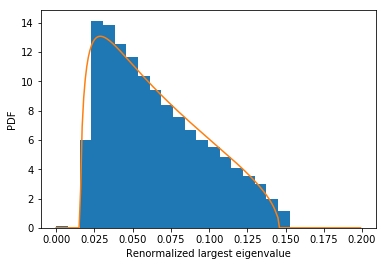

In [58]:
plt.hist(val,20,normed = 1,label = "Simulated value")
def dens_fit(x: float, T: float, L: int):
    """Integral of Marchenko-Pastur distribution function for
    arbitrary x from total tree length 'T' and number of markers L.
    """
    a = 2/T**2 * (1 - np.sqrt(N/L))**2
    b = 2/T**2 * (1 + np.sqrt(N/L))**2
    if x <= a:
        return 0.0
    if x >= b:
        return (N-1) * 1.0
    return (N-1) * dens(x, a, b) / dens(b, a, b)
xs = np.arange(0,0.2,0.001)
cdfs = [dens_fit(x,5.548,4014) for x in xs]
ys = [cdfs[index+1]-cdfs[index] for index in range(len(xs)-1)]
ys.append(0)
ys = np.array(ys)
ys[ys<0] = 0
plt.plot(xs,ys,label = "theoretical value")
plt.xlabel("Renormalized largest eigenvalue")
plt.ylabel("PDF")
plt.savefig(os.path.join(simulation_subfolder,"marchenko_pastur.pdf"))

In [53]:
cdfs

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.6506402269766913,
 9.547471932391906,
 18.418697246822372,
 28.548555065138938,
 39.55235082181342,
 51.18468312127598,
 63.275742511133835,
 75.70218718479684,
 88.37147384701477,
 101.21253279005852,
 114.16982292483662,
 127.19934732796595,
 140.26587943296622,
 153.34097353944708,
 166.40150306610226,
 179.42856497001975,
 192.40664474867194,
 205.32297088206104,
 218.16700952388797,
 230.93006466936984,
 243.60495874595236,
 256.18577527193366,
 268.66764993651725,
 281.04659982197745,
 293.3193829338138,
 305.4833820049925,
 317.5365078822525,
 329.4771188139828,
 341.30395272947516,
 353.0160701915113,
 364.6128061633322,
 376.09372908981675,
 387.45860607516113,
 398.707373163215,
 409.8401099052281,
 420.8570175430579,
 431.7584002515204,
 442.54464897735534,
 453.216227488731,
 463.77366031181333,
 474.217522282413,
 484.54842948325364,
 494.7670313726526,
 504.87400393975

FIT:  [   5.54820488 4022.62762434] [1.40528048e-03 8.19096539e+00]
Extrapolated value for the total tree length T: 5.548204883883381
Extrapolated value for number of loci L:, 4014.436658948716


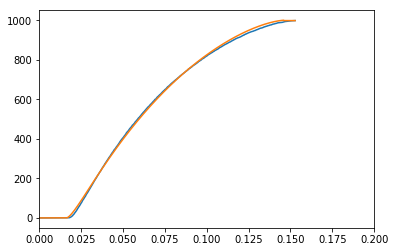

In [33]:
N = 1000
def dens(x: float, a: float, b: float) -> float:
    """Integral of Marchenko-Pastur distribution function on interval
    a < x < b.
    """
    arc1 = np.arcsin((2*x - a - b)/(b - a)/1.00001)
    arc2 = np.arcsin(((a+b)*x-2*a*b)/x/(b - a)/1.00001)
    res = (np.sqrt((b-x)*(x-a))
            + (a+b)*arc1/2
            - np.sqrt(a*b)*arc2
            + np.pi*((a+b)/2 - np.sqrt(a*b))/2)
    return res


def find_TW(lambdas, L: float, T: float, N: int) -> float:
    """Find Tracy-Widom statistics for the highest (first) eigenvalue
    among 'lambdas'.
    """
    m = len(lambdas)
    n = int(L)
    mu = (np.sqrt(n - 1) + np.sqrt(m))**2 / n
    sigma = (1/np.sqrt(n-1) + 1/np.sqrt(m))**(1/3) * (np.sqrt(n - 1) + np.sqrt(m)) / n
    l = lambdas[0] * T**2/2 # * m/np.sum(lambdas)
    s = (l - mu) / sigma
    print(f'n = {n}, l = {l},mu =  {mu},sigma = {sigma},T**2/2 = {T**2/2}, m/np.sum(lambdas) = {m/np.sum(lambdas)} s = {s}')
    return s


def find_T_and_L(file: str):
    """Find total tree length T and effective number of markers L using
    the bulk eigenvalues from eigensystem stored in (pickled) 'file'.
    """
    with open(file, 'rb') as f:
        lambdas, vecs = pickle.load(f)

    # finding L and T from fit

    lambdas_s = np.array(sorted(lambdas))
    lambdas_s = lambdas_s[1:]
    N = len(lambdas)

def dens_fit(x: float, T: float, L: int):
    """Integral of Marchenko-Pastur distribution function for
    arbitrary x from total tree length 'T' and number of markers L.
    """
    a = 2/T**2 * (1 - np.sqrt(N/L))**2
    b = 2/T**2 * (1 + np.sqrt(N/L))**2
    if x <= a:
        return 0.0
    if x >= b:
        return (N-1) * 1.0
    return (N-1) * dens(x, a, b) / dens(b, a, b)

popt, pcov = scipy.optimize.curve_fit(np.vectorize(dens_fit, otypes=[np.float]),
                       val, range(len(val)),
                       p0 = (1, N+1), bounds=([0.1, N], [100, 1000*N]))


plt.plot(val, range(len(val)))
lambdas_se = np.linspace(val.min(), val.max(), 5000)
l_dens_fit = [dens_fit(l, *popt) for l in lambdas_se]
import matplotlib.pylab as pyl
pyl.xlim([0.0,0.2])
plt.plot(lambdas_se, l_dens_fit)
plt.savefig('new_fit234.pdf')
p_err = np.sqrt(np.diag(pcov))
print('FIT: ', popt, p_err)
print(f'Extrapolated value for the total tree length T: {popt[0]}')
print(f'Extrapolated value for number of loci L:, {popt[1] - p_err[1]}')



In [50]:
Counter(presfs)

Counter({2: 108,
         9: 21,
         24: 11,
         82: 2,
         7: 21,
         26: 8,
         18: 18,
         28: 9,
         4: 48,
         15: 7,
         1: 220,
         3: 61,
         96: 1,
         17: 6,
         5: 42,
         62: 4,
         8: 18,
         10: 22,
         41: 6,
         85: 2,
         21: 4,
         42: 4,
         65: 1,
         70: 2,
         67: 5,
         6: 29,
         87: 2,
         14: 12,
         59: 4,
         69: 2,
         31: 9,
         71: 3,
         23: 9,
         40: 7,
         37: 7,
         54: 7,
         11: 19,
         12: 21,
         61: 2,
         66: 3,
         13: 14,
         20: 8,
         22: 12,
         30: 6,
         38: 5,
         89: 3,
         25: 11,
         19: 8,
         44: 6,
         27: 8,
         33: 4,
         58: 3,
         29: 2,
         77: 1,
         47: 3,
         68: 8,
         16: 11,
         97: 4,
         32: 4,
         57: 5,
         48: 2,
         50:

In [42]:
snp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])